### Dataset Stats

In [1]:
from huggingface_hub import hf_hub_download

# Download a specific file if you know its name
file_path = hf_hub_download(repo_id="oishee3003/CAFOSat", filename="CAFOSat.csv", repo_type="dataset")
print(file_path)

import pandas as pd
df = pd.read_csv(file_path)

print(df.columns)
# Count of rows per unique value in 'category'
category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']
print("Rows per category:")
print(category_counts)


# Count of rows per unique value in 'state'
state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']
print("\nRows per state:")
print(state_counts)


# Count of rows per unique value in 'verified_label'
verified_label_counts = df['verified_label'].value_counts().reset_index()
verified_label_counts.columns = ['verified_label', 'count']
print("\nRows per verified_label:")
print(verified_label_counts)

# Count of rows per unique value in 'image_type'
image_type_counts = df['image_type'].value_counts().reset_index()
image_type_counts.columns = ['image_type', 'count']
print("\nRows per image_type:")
print(image_type_counts)


/home/gza5dr/.cache/huggingface/hub/datasets--oishee3003--CAFOSat/snapshots/152f4c5885c16dd63eddf295a461890d3c761343/CAFOSat.csv
Index(['patch_file', 'label', 'barn', 'manure_pond', 'grazing_area', 'others',
       'geom_bbox', 'geometry', 'poly_crs', 'patch_crs', 'category', 'state',
       'weak_x', 'weak_y', 'refined_x', 'refined_y', 'patch_res',
       'verified_label', 'CAFO_UNIQUE_ID', 'image_type', 'orig_patch_file',
       'prompt', 'cafosat_set1_training_train', 'cafosat_set1_training_test',
       'cafosat_set1_training_val', 'cafosat_verified_training_train',
       'cafosat_verified_training_test', 'cafosat_verified_training_val',
       'cafosat_augmented_training_train', 'cafosat_augmented_training_test',
       'cafosat_augmented_training_val', 'cafosat_training_verified_train',
       'cafosat_training_verified_test', 'cafosat_training_verified_val',
       'cafosat_all_training_train', 'cafosat_all_training_test',
       'cafosat_all_training_val', 'cafosat_merged_trai

### Load Dataset Based on Different Splits

/home/gza5dr/.cache/huggingface/hub/datasets--oishee3003--CAFOSat/snapshots/152f4c5885c16dd63eddf295a461890d3c761343/CAFOSat.csv
tensor([ 69.9160,  71.2605, 150.3193, 152.2017]) tensor(4)


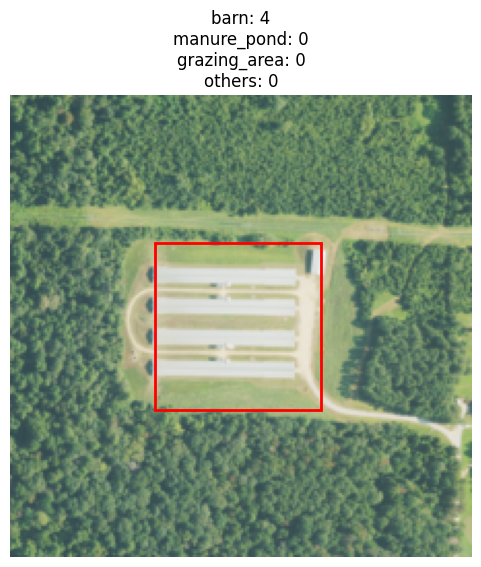

In [3]:
from huggingface_hub import hf_hub_download
from utils import *

# Download a specific file if you know its name
file_path = hf_hub_download(repo_id="oishee3003/CAFOSat", filename="CAFOSat.csv", repo_type="dataset")
print(file_path)
data_dir = '..' ## where your images are saved and extracted

"""
function: get_cafo_dataloader_from_csv(data_dir, csv_path, dataset_name='set1', split='train', task='binary',
                                  batch_size=32, shuffle=True, transform=None)
# "task" Options for how to load the dataset:
# - "binary": Only CAFO vs. non-CAFO labels
# - "multi": Multiclass CAFO categories
# - "bbox": Includes image, label, and bounding box of CAFO areas
# - "infra": Includes image, label, and infrastructure annotations
# - "all": Full dataset with all information

# Dataset options:
# - "verified": Only human-verified labels
# - "set1": Custom split 1
# - "set2": Custom split 2
# - "merged": Combination of sets
# - "augmented": Includes data augmentation

"""

train_loader = get_cafo_dataloader_from_csv(
    data_dir = data_dir,
    csv_path = file_path,
    dataset_name="verified",
    split="train",
    task="all",  
    batch_size=16,
    shuffle=True
)

# Get one positive sample
for images, labels, infra, bboxes in train_loader:
    for i in range(len(labels)):
        if labels[i] > 0:
            image = images[i]
            bbox = bboxes[i]
            infra_info = infra[i]
            label = labels[i]
            print(bbox, label)
            break
    else:
        continue
    break  

# Call the visualizer
show_image_with_bbox(image, bbox, infra_info,label)


<ExFileObject name='/home/gza5dr/.cache/huggingface/hub/datasets--oishee3003--CAFOSat/snapshots/152f4c5885c16dd63eddf295a461890d3c761343/GA_filtered.tar.gz'>


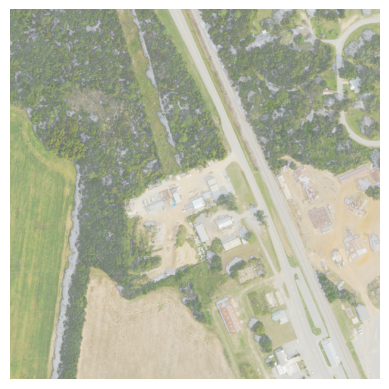

In [5]:
from huggingface_hub import hf_hub_download
from PIL import Image
import matplotlib.pyplot as plt

# Download and extract the tar file if needed manually
file_path = hf_hub_download(
    repo_id="oishee3003/CAFOSat",
    filename="GA_filtered.tar.gz",
    repo_type="dataset"
)

# Then extract manually or mount with fsspec/tarfile to find the image
import tarfile

with tarfile.open(file_path, "r:gz") as tar:
    member = tar.getmember("GA_filtered/crop_26_patch_21_dairy_GA.tif")
    image_file = tar.extractfile(member)
    print(image_file)
    img = Image.open(image_file)
    img = Image.open(image_file)  # ✅ Do this inside the with-block

    # Optionally load into memory (if needed later)
    img.load()

# Now you can use img outside safely
plt.imshow(img)
plt.axis("off")
plt.show()

## Loading the Data from Hugging Face

In [10]:
from datasets import load_dataset

#dataset link: https://huggingface.co/datasets/oishee3003/CAFOSat

# """
# To download all data

# """
# # Load the default configuration/split
ds = load_dataset("oishee3003/CAFOSat",data_files="AR_filtered.tar.gz")

ds = load_dataset("oishee3003/CAFOSat")

"""
To download specific data

"""
# ds = load_dataset(
#     "oishee3003/CAFOSat",
#     data_files="AR_filtered.tar.gz",  ##change the filename
#     streaming=True,
#     split="train"
# )



'\nTo download specific data\n\n'

{'__key__': 'AR_filtered/crop_126_patch_15_dairy_AR', '__url__': '/home/gza5dr/.cache/huggingface/datasets/downloads/214dea5f60af95695f6d4eb3dbc349516635f8adb7e31ca1bf310f0155b52855', 'tif': <PIL.TiffImagePlugin.TiffImageFile image mode=RGBA size=833x833 at 0x7F2C52FF4D30>}


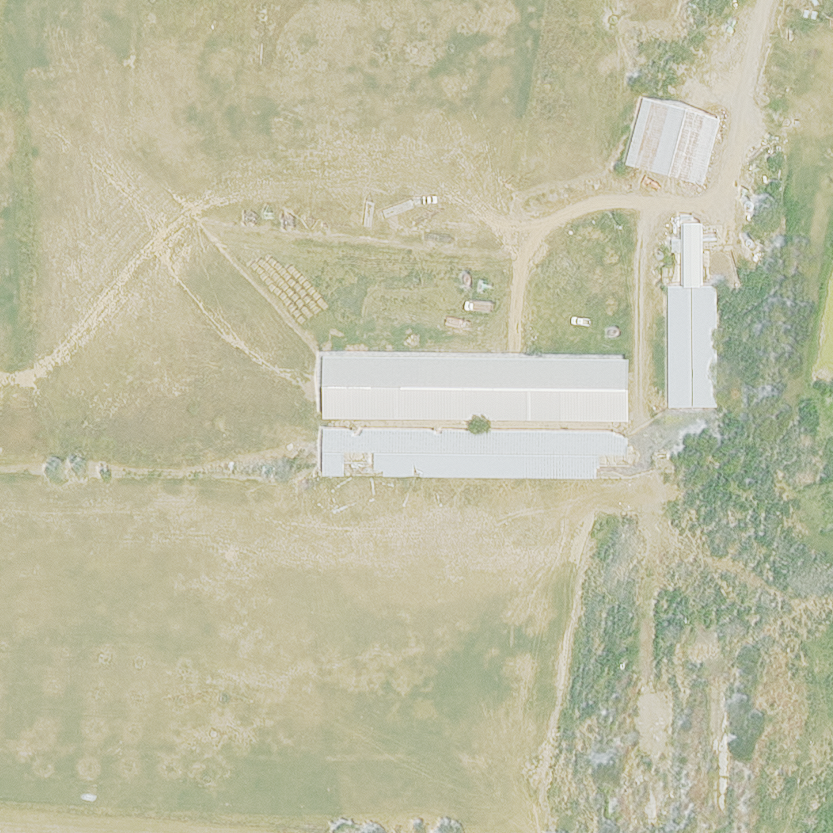

In [9]:
from PIL import Image
import io

# View one example
for row in ds['train']:
    print(row)
    break
row = next(iter(ds['train']))
row['tif'].show()



In [ ]:
## check number of examples

states = ['barn']

for state in states:
    # Load dataset in streaming mode
    ds = load_dataset(
        "oishee3003/CAFOSat",
        data_files=f"{state}.tar.gz",
        streaming=True,
        split="train"
    )

    # Count number of rows
    count = sum(1 for _ in ds)
    print(f"Total number of examples: {count}")


## Visualizing Data from Hugging Face

In [ ]:
from huggingface_hub import hf_hub_download
from PIL import Image
import matplotlib.pyplot as plt

# Download and extract the tar file if needed manually
file_path = hf_hub_download(
    repo_id="oishee3003/CAFOSat",
    filename="GA_filtered.tar.gz",
    repo_type="dataset"
)

# Then extract manually or mount with fsspec/tarfile to find the image
import tarfile

with tarfile.open(file_path, "r:gz") as tar:
    member = tar.getmember("GA_filtered/crop_26_patch_21_dairy_GA.tif")
    image_file = tar.extractfile(member)
    print(image_file)
    img = Image.open(image_file)
    img = Image.open(image_file)  # ✅ Do this inside the with-block

    # Optionally load into memory (if needed later)
    img.load()

# Now you can use img outside safely
plt.imshow(img)
plt.axis("off")
plt.show()